In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as prep
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from sklearn.linear_model import LogisticRegression


# Data Cleaning : 

In [3]:
# Import the data first.
kaggle = pd.read_csv('clean_kaggle_data_2020.csv')
# Delete the first row because the first row because it is the description of the questions.
kaggle = kaggle.iloc[1:,:]
# Make the index start from 0
kaggle.reset_index(inplace = True, drop = True)
kaggle.Q24_Encoded.nunique()

/Users/ningcansun/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,206) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


15

In [6]:
kaggle

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
0,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
1,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
2,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,999"
3,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999"
4,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,2104,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,Python,NaN,NaN,...,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN,0.0,"0-9,999"
10725,5461,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
10726,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
10727,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN,0.0,"0-9,999"


In [7]:
kaggle_temp=kaggle.copy()

In [8]:
kaggle_temp.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
0,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
1,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
2,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,999"
3,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999"
4,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,"30,000-39,999"


In [9]:
kaggle.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
0,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
1,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
2,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,999"
3,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999"
4,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,"30,000-39,999"


In [10]:
kaggle_temp['political_party'] = ''

In [11]:
kaggle_temp.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets,political_party
0,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999",
1,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999",
2,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,999",
3,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999",
4,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,"30,000-39,999",


In [12]:
kaggle.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
0,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
1,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
2,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,999"
3,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999"
4,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,"30,000-39,999"


In [13]:
#Print the null value number in each column
kaggle_null_sum=pd.DataFrame(kaggle.isnull().sum())
kaggle_null_sum.columns = ['Null_value']
#Print the null value number >5730 columns
kaggle_null_sum_5730=kaggle_null_sum[kaggle_null_sum.Null_value > 5730]
pd.set_option('display.max_rows', None) 
kaggle_null_sum_5730.shape
#kaggle.Q24.nunique()

(327, 1)

<div style='color:blue'>So according to the shape of the Kaggle null value, there are 327 columns have more than 5730 null values, so we can say only 30 columns have more than 5000 values.

In [14]:
# Because the useful dataset columns is really less
#so I decide to choose the useful columns by my self. 
#According to the previous null value calculation, I collect useful features:
kaggle_final = kaggle[ ['Q1','Q2','Q4','Q5','Q6','Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7',
'Q7_Part_8','Q7_Part_9','Q7_Part_10','Q7_Part_11','Q7_Part_12','Q7_OTHER','Q12_Part_1','Q12_Part_2','Q12_Part_3','Q12_OTHER','Q13','Q15','Q16_Part_1',
'Q16_Part_2','Q16_Part_3','Q16_Part_4','Q16_Part_5','Q16_Part_6','Q16_Part_7',
'Q16_Part_8','Q16_Part_9','Q16_Part_10','Q16_Part_11','Q16_Part_12','Q16_Part_13','Q16_Part_14','Q16_Part_15','Q16_OTHER','Q24_Encoded']].copy()

In [15]:
kaggle_final.head()

,Q1,Q2,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,...,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q24_Encoded
0,30-34,Man,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1,35-39,Man,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,30-34,Man,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
3,35-39,Man,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,...,LightGBM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
4,35-39,Man,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Tidymodels,NaN,NaN,NaN,3.0


In [16]:
# First select the categorical variables which only have one variablea and rest of them are Null value. Use dummie encode to encode them.
categorical=kaggle_final[['Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7',
'Q7_Part_8','Q7_Part_9','Q7_Part_10','Q7_Part_11','Q7_Part_12','Q7_OTHER','Q12_Part_1','Q12_Part_2','Q12_Part_3','Q12_OTHER','Q16_Part_1',
'Q16_Part_2','Q16_Part_3','Q16_Part_4','Q16_Part_5','Q16_Part_6','Q16_Part_7',
'Q16_Part_8','Q16_Part_9','Q16_Part_10','Q16_Part_11','Q16_Part_12','Q16_Part_13','Q16_Part_14','Q16_Part_15','Q16_OTHER']].copy()
categorical = pd.get_dummies(categorical)


In [17]:
# Fill Q13 NA as "Never"， because there is a really high number of 'never', so fill na as 'Never' will not influence the distribution.
# So map the Null to'Never' is ok.
kaggle.Q13.value_counts()

Never                 7039
2-5 times             1422
Once                  1202
6-25 times             305
More than 25 times     200
Name: Q13, dtype: int64

In [18]:
# Fill Q15 NA become 'Under 1 year'
kaggle.Q15.value_counts()

Under 1 year                             3038
1-2 years                                2223
2-3 years                                1248
I do not use machine learning methods    1055
3-4 years                                 772
5-10 years                                746
4-5 years                                 693
10-20 years                               229
20 or more years                          164
Name: Q15, dtype: int64

In [19]:
# Fill NA and check whether it stills have the NA value. 
kaggle_final.Q13=kaggle_final.Q13.fillna('Never')
kaggle_final.Q13.isna().sum()
kaggle_final.Q15=kaggle_final.Q15.fillna('Under 1 year')
kaggle_final.Q15.isna().sum()

0

In [20]:
#Select ordinal features, in order to transform the ordinal variables, we need to select ordinal features
ordinal_features = kaggle_final[['Q1','Q4','Q6','Q13','Q15','Q24_Encoded']].copy()
ordinal_features.Q13.isna().sum()

0

In [21]:
#Encode each ordinal feature
#The lowest is encoded as 0 
Q1_encode = {'18-21':0,'22-24':1,'25-29':2,'30-34':3, '35-39':4, '40-44':5, '45-49':6,'50-54':7,'55-59':8,'60-69':9,'70+':10,'70':10}
Q4_encode = {'I prefer not to answer':0,'No formal education past high school':1,'Some college/university study without earning a bachelor’s degree':2,'Bachelor’s degree':3,'Professional degree':4, 'Master’s degree':5,'Doctoral degree':6}
Q6_encode = {'< 1 years':1,'1-2 years':2,'3-5 years':3,'5-10 years':4, '10-20 years':5,'20+ years':6, 'I have never written code':0}
Q13_encode = {'Never':0,'Once':1,'2-5 times':2,'6-25 times':3,'More than 25 times':4,0:0}
Q15_encode = {'I do not use machine learning methods':0,'Never':0,'Under 1 year':1,'1-2 years':2, '2-3 years':3, '3-4 years':4,'4-5 years':5, '5-10 years':6, '10-20 years':7,'20 or more years':8}
kaggle_final.Q15.unique()

array(['1-2 years', 'I do not use machine learning methods', '3-4 years',
       '2-3 years', 'Under 1 year', '4-5 years', '5-10 years',
       '20 or more years', '10-20 years'], dtype=object)

In [22]:
#Transform ordinal data into numerical variables
#Rename them as the Q_encode.
ordinal_features.loc[0:,'Q1_encode'] = ordinal_features.loc[0:,'Q1'].map(Q1_encode)
ordinal_features.loc[0:,'Q1_encode'] = ordinal_features.loc[0:,'Q1_encode'].astype(int)

ordinal_features.loc[0:,'Q4_encode'] = ordinal_features.loc[0:,'Q4'].map(Q4_encode)
ordinal_features.loc[0:,'Q4_encode'] = ordinal_features.loc[0:,'Q4_encode'].astype(int)

ordinal_features.loc[0:,'Q6_encode'] = ordinal_features.loc[0:,'Q6'].map(Q6_encode)
ordinal_features.loc[0:,'Q6_encode'] = ordinal_features.loc[0:,'Q6_encode'].astype(int)

ordinal_features.loc[0:,'Q13_encode'] = ordinal_features.loc[0:,'Q13'].map(Q13_encode)
ordinal_features.loc[0:,'Q13_encode'] = ordinal_features.loc[0:,'Q13_encode'].astype(int)

ordinal_features.loc[0:,'Q15_encode'] = ordinal_features.loc[0:,'Q15'].map(Q15_encode)
ordinal_features.loc[0:,'Q15_encode'] = ordinal_features.loc[0:,'Q15_encode'].astype(int)



In [23]:
# We need to drop the Q1, Q4, Q6, Q13 and Q15 in order to make the columns not duplicate.
# Keep the Q1_encode, Q4_encode, Q6_encode, Q13_encode, Q15_encode.
ordinal_features=ordinal_features.drop(['Q1','Q4','Q6','Q13','Q15'],axis = 1)
ordinal_features.shape


(10729, 6)

In [24]:
#Use the One hot encoder to encode the categorical variables
# These categorical columns include lots of values in one column, so use the one hot encoding.
one_hot_enc = prep.OneHotEncoder(sparse=False)

In [25]:
df=kaggle_final[['Q2','Q5']]

In [26]:
kaggle_final.shape

(10729, 41)

In [27]:
# One hot Encode the Q2 into two columns, the first column is Q2-Man and the second column is Q2 - Women
categorical_encoded_Q2 = one_hot_enc.fit_transform(kaggle_final[['Q2']])
Gender = pd.DataFrame(categorical_encoded_Q2)
Gender.columns = "Q2_Man Nonbinary Prefer_not_to_say Prefer_to_self_describe Q2_Woman".split(" ")
Gender.head()


,Q2_Man,Nonbinary,Prefer_not_to_say,Prefer_to_self_describe,Q2_Woman
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [28]:
# Encode the Q5 into 11 columns, one hot encoding
categorical_encoded_Q5 = one_hot_enc.fit_transform(kaggle_final[['Q5']])
ML_time=pd.DataFrame(categorical_encoded_Q5)
ML_time.columns = "Q5-Business_Analyst Q5-DBA/Database_Engineer Q5-Data_Analyst Q5-Data_Engineering Q5-Data_Scientist Q5-Machine_Learning_Engineer Q5-Other Q5-Product/Project_Manager Q5-Research_Scientist Q5-Software_Engineer Q5-Statistician".split(" ")        
ML_time.head()

,Q5-Business_Analyst,Q5-DBA/Database_Engineer,Q5-Data_Analyst,Q5-Data_Engineering,Q5-Data_Scientist,Q5-Machine_Learning_Engineer,Q5-Other,Q5-Product/Project_Manager,Q5-Research_Scientist,Q5-Software_Engineer,Q5-Statistician
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
# Combine the final dataset I would like to analysis.
# Gender column is the Q2 one hot encoding dataframe.
# ML_time is the Q5 one hot encoding dataframe.
# Categorical is the columns which is categorical and only have one value
# Ordinal_featrures is the ordinal encode dataframe.
# Next we fill na with the categorical dataframe.
kaggle_final.fillna(0)
kaggle_final=pd.concat([Gender,ML_time,categorical,ordinal_features],axis=1)
kaggle_final.head()


,Q2_Man,Nonbinary,Prefer_not_to_say,Prefer_to_self_describe,Q2_Woman,Q5-Business_Analyst,Q5-DBA/Database_Engineer,Q5-Data_Analyst,Q5-Data_Engineering,Q5-Data_Scientist,...,Q16_Part_13_ Tidymodels,Q16_Part_14_ JAX,Q16_Part_15_None,Q16_OTHER_Other,Q24_Encoded,Q1_encode,Q4_encode,Q6_encode,Q13_encode,Q15_encode
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,10.0,3,5,4,2,2
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1.0,4,3,5,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,11.0,3,5,4,2,4
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,7.0,4,6,4,2,3
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,3.0,4,6,2,0,1


In [30]:
# Reorder the columns.
kaggle_final.columns
kaggle_final = kaggle_final[['Q1_encode','Q2_Man', 'Q2_Woman','Q4_encode','Q5-Business_Analyst', 'Q5-DBA/Database_Engineer',
       'Q5-Data_Analyst', 'Q5-Data_Engineering', 'Q5-Data_Scientist',
       'Q5-Machine_Learning_Engineer', 'Q5-Other',
       'Q5-Product/Project_Manager', 'Q5-Research_Scientist',
       'Q5-Software_Engineer', 'Q5-Statistician','Q6_encode','Q7_Part_1_Python',
       'Q7_Part_2_R', 'Q7_Part_3_SQL', 'Q7_Part_4_C', 'Q7_Part_5_C++',
       'Q7_Part_6_Java', 'Q7_Part_7_Javascript', 'Q7_Part_8_Julia',
       'Q7_Part_9_Swift', 'Q7_Part_10_Bash', 'Q7_Part_11_MATLAB',
       'Q7_Part_12_None', 'Q7_OTHER_Other','Q12_Part_1_GPUs',
       'Q12_Part_2_TPUs', 'Q12_Part_3_None', 'Q12_OTHER_Other','Q13_encode','Q15_encode','Q16_Part_1_  Scikit-learn ', 'Q16_Part_2_  TensorFlow ',
       'Q16_Part_3_ Keras ', 'Q16_Part_4_ PyTorch ', 'Q16_Part_5_ Fast.ai ',
       'Q16_Part_6_ MXNet ', 'Q16_Part_7_ Xgboost ', 'Q16_Part_8_ LightGBM ',
       'Q16_Part_9_ CatBoost ', 'Q16_Part_10_ Prophet ', 'Q16_Part_11_ H2O 3 ',
       'Q16_Part_12_ Caret ', 'Q16_Part_13_ Tidymodels ', 'Q16_Part_14_ JAX ',
       'Q16_Part_15_None', 'Q16_OTHER_Other','Q24_Encoded']]



In [31]:
kaggle_final.head()

,Q1_encode,Q2_Man,Q2_Woman,Q4_encode,Q5-Business_Analyst,Q5-DBA/Database_Engineer,Q5-Data_Analyst,Q5-Data_Engineering,Q5-Data_Scientist,Q5-Machine_Learning_Engineer,...,Q16_Part_8_ LightGBM,Q16_Part_9_ CatBoost,Q16_Part_10_ Prophet,Q16_Part_11_ H2O 3,Q16_Part_12_ Caret,Q16_Part_13_ Tidymodels,Q16_Part_14_ JAX,Q16_Part_15_None,Q16_OTHER_Other,Q24_Encoded
0,3,1.0,0.0,5,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,10.0
1,4,1.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
2,3,1.0,0.0,5,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,11.0
3,4,1.0,0.0,6,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,7.0
4,4,1.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,3.0


In [32]:
# Check how many columns in this final dataset.
kaggle_final.shape

(10729, 52)

# 2. Exploratory data analysis and feature selection:

In [23]:
#Correlation: First Select the features, Q24 is not the Feature, it is targets.
feature = kaggle_final.iloc[:,:-1]
feature.shape

(10729, 51)

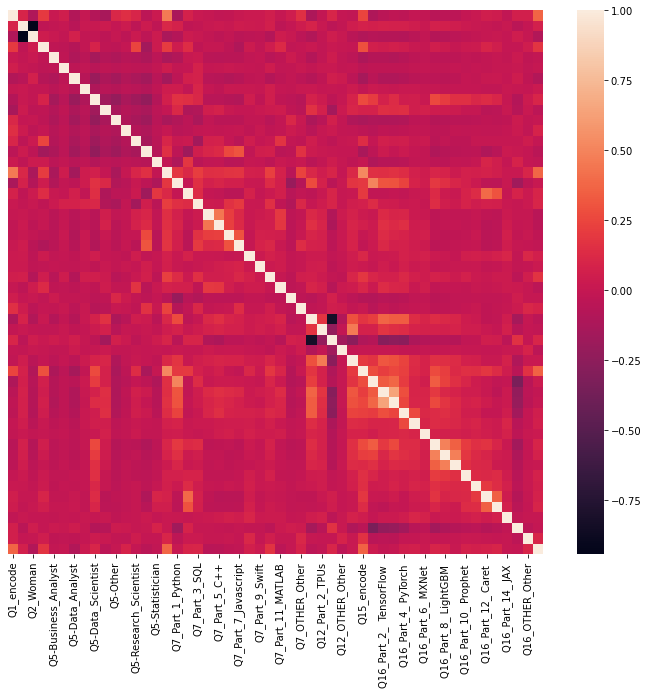

In [24]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = kaggle_final.corr()
cor
ax = sns.heatmap(cor, xticklabels=2, yticklabels=False)

In [25]:
cor = kaggle_final.corr()
pd.set_option("display.max_rows", None, "display.max_columns", None)
cor
#Selecting low correlated features with Q24_Encoded
low_cor_24Encoded = cor[(-0.05 < cor) & (cor<0.05)]
len(low_cor_24Encoded) - low_cor_24Encoded.Q24_Encoded.isna().sum().sum()

# Selete data are most related to a survey respondent’s yearly compensation

cor.Q24_Encoded.value_counts().index.sort_values()[::-1]
cor[cor['Q24_Encoded']==0.3757584593294158]

,Q1_encode,Q2_Man,Q2_Woman,Q4_encode,Q5-Business_Analyst,Q5-DBA/Database_Engineer,Q5-Data_Analyst,Q5-Data_Engineering,Q5-Data_Scientist,Q5-Machine_Learning_Engineer,Q5-Other,Q5-Product/Project_Manager,Q5-Research_Scientist,Q5-Software_Engineer,Q5-Statistician,Q6_encode,Q7_Part_1_Python,Q7_Part_2_R,Q7_Part_3_SQL,Q7_Part_4_C,Q7_Part_5_C++,Q7_Part_6_Java,Q7_Part_7_Javascript,Q7_Part_8_Julia,Q7_Part_9_Swift,Q7_Part_10_Bash,Q7_Part_11_MATLAB,Q7_Part_12_None,Q7_OTHER_Other,Q12_Part_1_GPUs,Q12_Part_2_TPUs,Q12_Part_3_None,Q12_OTHER_Other,Q13_encode,Q15_encode,Q16_Part_1_ Scikit-learn,Q16_Part_2_ TensorFlow,Q16_Part_3_ Keras,Q16_Part_4_ PyTorch,Q16_Part_5_ Fast.ai,Q16_Part_6_ MXNet,Q16_Part_7_ Xgboost,Q16_Part_8_ LightGBM,Q16_Part_9_ CatBoost,Q16_Part_10_ Prophet,Q16_Part_11_ H2O 3,Q16_Part_12_ Caret,Q16_Part_13_ Tidymodels,Q16_Part_14_ JAX,Q16_Part_15_None,Q16_OTHER_Other,Q24_Encoded
Q6_encode,0.45572,0.109548,-0.121176,0.207894,-0.120102,0.039847,-0.152472,0.043766,0.063858,-0.007393,-0.125142,0.004932,0.104453,0.153598,-0.010781,1.0,0.18272,0.112228,0.21117,0.144896,0.154957,0.170379,0.175438,0.073455,0.059,0.224624,0.075417,-0.057776,0.239468,0.106283,0.046281,0.096858,-0.002797,0.116485,0.517368,0.152132,0.144216,0.157777,0.138228,0.069089,0.038798,0.102208,0.085104,0.036004,0.07146,0.06105,0.079995,0.057206,0.019653,0.016185,0.101384,0.375758


In [26]:
# low_cor_24Encoded[low_cor_24Encoded.Q24_Encoded != np.nan]
low_cor_24Encoded[low_cor_24Encoded["Q24_Encoded"].isna()].index

Index(['Q1_encode', 'Q2_Man', 'Q2_Woman', 'Q4_encode', 'Q5-Data_Analyst',
       'Q5-Data_Scientist', 'Q5-Product/Project_Manager',
       'Q5-Software_Engineer', 'Q6_encode', 'Q7_Part_2_R', 'Q7_Part_3_SQL',
       'Q7_Part_4_C', 'Q7_Part_5_C++', 'Q7_Part_8_Julia', 'Q7_Part_10_Bash',
       'Q7_OTHER_Other', 'Q12_Part_3_None', 'Q15_encode',
       'Q16_Part_4_ PyTorch ', 'Q16_Part_5_ Fast.ai ', 'Q16_Part_7_ Xgboost ',
       'Q16_Part_8_ LightGBM ', 'Q16_Part_10_ Prophet ', 'Q16_Part_11_ H2O 3 ',
       'Q16_Part_12_ Caret ', 'Q16_Part_13_ Tidymodels ', 'Q16_OTHER_Other',
       'Q24_Encoded'],
      dtype='object')

In [27]:
kaggle_final_reduce=kaggle_final[['Q1_encode', 'Q2_Man', 'Q2_Woman', 'Q4_encode', 'Q5-Data_Analyst',
       'Q5-Data_Scientist', 'Q5-Product/Project_Manager',
       'Q5-Software_Engineer', 'Q6_encode', 'Q7_Part_2_R', 'Q7_Part_3_SQL',
       'Q7_Part_4_C', 'Q7_Part_5_C++', 'Q7_Part_8_Julia', 'Q7_Part_10_Bash',
       'Q7_OTHER_Other', 'Q12_Part_3_None', 'Q15_encode',
       'Q16_Part_4_ PyTorch ', 'Q16_Part_5_ Fast.ai ', 'Q16_Part_7_ Xgboost ',
       'Q16_Part_8_ LightGBM ', 'Q16_Part_10_ Prophet ', 'Q16_Part_11_ H2O 3 ',
       'Q16_Part_12_ Caret ', 'Q16_Part_13_ Tidymodels ', 'Q16_OTHER_Other',
       'Q24_Encoded']]
kaggle_final_reduce.shape

(10729, 28)

<div style='color:blue'>The Q6_encode & Q15_encode have a correlation 0.517368, Q7_Part_1_Python & Q16_Part_1_ Scikit-learn	have correlation 0.501113, Q16_Part_3_ Keras & Q16_Part_2_ TensorFlow has a correlation 0.638862. They all not have very high correlation, so I decide not delete columns.

In [28]:
#Scaling Standardized data
feature_standardized = prep.StandardScaler().fit_transform(feature)
feature_standardized

pca=PCA(n_components =40)
feature=pca.fit_transform(feature)

pottery_var=np.cumsum(pca.explained_variance_ratio_*100)
pottery_var

# Wee can see that almost 37 variables can explain 99% of variance.

array([37.68161317, 56.2529056 , 64.88252933, 71.89617831, 77.100981  ,
       79.58064667, 81.49576231, 82.91073681, 84.28360629, 85.55194899,
       86.62434105, 87.5482769 , 88.45672987, 89.27436738, 90.05231493,
       90.77438421, 91.45015589, 92.0225475 , 92.56337437, 93.07992177,
       93.57128529, 94.04121745, 94.49788351, 94.95052328, 95.39080005,
       95.79102789, 96.17692546, 96.5329492 , 96.8627388 , 97.17364956,
       97.47053089, 97.73360258, 97.9767194 , 98.20268815, 98.42327083,
       98.62452558, 98.82379031, 99.01470524, 99.15977881, 99.28863022])

In [29]:
feature.shape

(10729, 40)

In [30]:
correlation_Q24=cor.iloc[:,-1]
correlation_Q24 = pd.DataFrame(correlation_Q24)
abs_correlation_Q24=abs(correlation_Q24.Q24_Encoded)
abs_correlation_Q24= pd.DataFrame(abs_correlation_Q24)
abs_correlation_Q24['Variable']=abs_correlation_Q24.index
abs_correlation_Q24.head()

,Q24_Encoded,Variable
Q1_encode,0.367102,Q1_encode
Q2_Man,0.073306,Q2_Man
Q2_Woman,0.086714,Q2_Woman
Q4_encode,0.177688,Q4_encode
Q5-Business_Analyst,0.014971,Q5-Business_Analyst


In [31]:
# Reorder the correlation, let it shows acending, it may easy to graph the feature importance.
abs_correlation_Q24=abs_correlation_Q24.sort_values('Q24_Encoded')

[Text(0, 0, 'Q5-DBA/Database_Engineer'),
 Text(1, 0, 'Q16_Part_3_ Keras '),
 Text(2, 0, 'Q16_Part_14_ JAX '),
 Text(3, 0, 'Q5-Research_Scientist'),
 Text(4, 0, 'Q7_Part_12_None'),
 Text(5, 0, 'Q5-Other'),
 Text(6, 0, 'Q16_Part_15_None'),
 Text(7, 0, 'Q16_Part_9_ CatBoost '),
 Text(8, 0, 'Q16_Part_2_  TensorFlow '),
 Text(9, 0, 'Q7_Part_1_Python'),
 Text(10, 0, 'Q13_encode'),
 Text(11, 0, 'Q5-Business_Analyst'),
 Text(12, 0, 'Q12_Part_2_TPUs'),
 Text(13, 0, 'Q7_Part_7_Javascript'),
 Text(14, 0, 'Q5-Statistician'),
 Text(15, 0, 'Q16_Part_6_ MXNet '),
 Text(16, 0, 'Q7_Part_6_Java'),
 Text(17, 0, 'Q5-Data_Engineering'),
 Text(18, 0, 'Q7_Part_9_Swift'),
 Text(19, 0, 'Q16_Part_1_  Scikit-learn '),
 Text(20, 0, 'Q7_Part_11_MATLAB'),
 Text(21, 0, 'Q12_OTHER_Other'),
 Text(22, 0, 'Q5-Machine_Learning_Engineer'),
 Text(23, 0, 'Q12_Part_1_GPUs'),
 Text(24, 0, 'Q7_Part_5_C++'),
 Text(25, 0, 'Q5-Software_Engineer'),
 Text(26, 0, 'Q16_Part_4_ PyTorch '),
 Text(27, 0, 'Q7_Part_4_C'),
 Text(28, 0, 'Q1

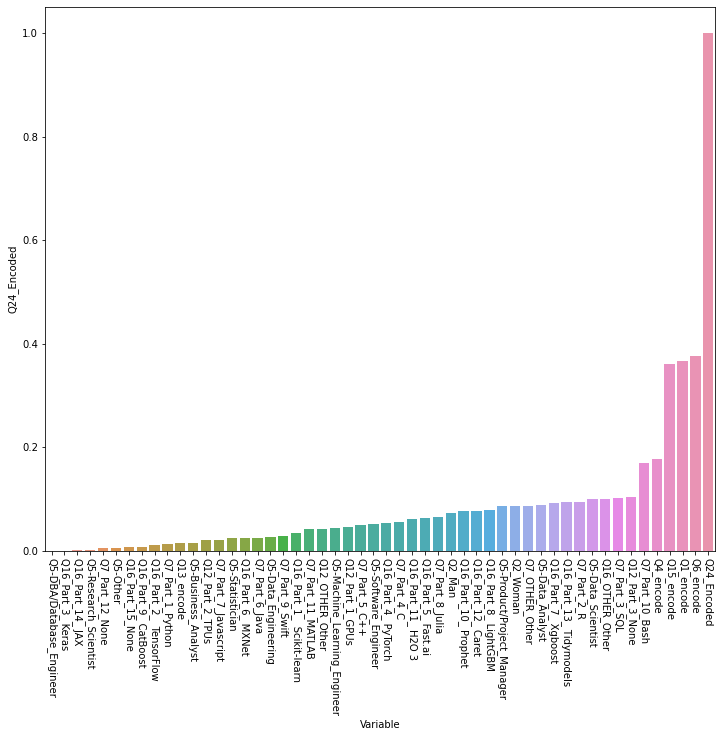

In [32]:
# Feature importance
import seaborn as sns
plt.figure(figsize=(12,10))
ax = sns.barplot(x="Variable", y="Q24_Encoded", data=abs_correlation_Q24)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)

<div style='color:orange'>Question: which of the original attributes in the data are most related to a survey respondent’s yearly compensation?

<div style='color:blue'> As we can see in the bar plot, I plot the correlation between Q24_encoded and the other columns, it can shows the importance of feature. The Q16 and Q1 is really important. The original attributes in the data are most related to a survey respondent’s yearly compensation is Q6, Q1, Q15 and Q4.

<div style='color:orange'>Question: Explain how feature engineering is a useful tool in machine learning in the context of the tasks in this assignment. 

<div style='color:blue'> The feature engineering is really importance, because when we did the correlation between the target and independent variables, we can delete the independent variables which has low correlations with target. Also it can extract features from original raw data (Kaggle dataset), also can check the final dataset we choose can be best fits the machine learning algorithm. In this assignment, the variables are almost 300, so we must to select the most useful one to fit into ML algorithm. 

# 3. Model implementation:

In [1]:
# First separate the data, X is the final data set, y is the final data set without the target column.
X = kaggle_final_reduce.drop(['Q24_Encoded'],axis = 1).copy()
y = kaggle_final_reduce['Q24_Encoded'].copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

NameError: name 'kaggle_final_reduce' is not defined

In [2]:
#First to separate the Q24_Encoded into 13 columns, in order to make the ordinal logistic regression
value = y_train

condition_list = range(0,14)
final_list = []
for i in condition_list:
    column_result_list = []
    for j in value:
        if i >= j:
            column_result_list.append(1)
        else:
            column_result_list.append(0)
    final_list.append(column_result_list)

binary_result = pd.DataFrame({"0":final_list[0],"1":final_list[1],"2":final_list[2],"3":final_list[3],"4":final_list[4],"5":final_list[5],"6":final_list[6],"7":final_list[7],"8":final_list[8],"9":final_list[9],"10":final_list[10],"11":final_list[11],"12":final_list[12],"13":final_list[13]})
binary_result.columns = "Q24_0 Q24_1 Q24_2 Q24_3 Q24_4 Q24_5 Q24_6 Q24_7 Q24_8 Q24_9 Q24_10 Q24_11 Q24_12 Q24_13".split(" ")   
binary_result.head()


NameError: name 'y_train' is not defined

<div style='color:blue'> Below is the ordinal logistic regression

In [35]:
# Use the ordinal logistic regression to calculate for each observation's prediction.

OLR = LogisticRegression(max_iter = 10000)
OLR.fit(X_train.values,binary_result.values[:,0])
proba_1 = OLR.predict_proba(X_train.values)[:,1]
proba_1

OLR.fit(X_train.values,binary_result.values[:,1])
proba_2_cum = OLR.predict_proba(X_train.values)[:,1]
proba_2=proba_2_cum - proba_1
proba_2

OLR.fit(X_train.values,binary_result.values[:,2])
proba_3_cum = OLR.predict_proba(X_train.values)[:,1]
proba_3=proba_3_cum - proba_2_cum
proba_3

OLR.fit(X_train.values,binary_result.values[:,3])
proba_4_cum = OLR.predict_proba(X_train.values)[:,1]
proba_4=proba_4_cum - proba_3_cum
proba_4

OLR.fit(X_train.values,binary_result.values[:,4])
proba_5_cum = OLR.predict_proba(X_train.values)[:,1]
proba_5=proba_5_cum - proba_4_cum
proba_5

OLR.fit(X_train.values,binary_result.values[:,5])
proba_6_cum = OLR.predict_proba(X_train.values)[:,1]
proba_6=proba_6_cum - proba_5_cum
proba_6

OLR.fit(X_train.values,binary_result.values[:,6])
proba_7_cum = OLR.predict_proba(X_train.values)[:,1]
proba_7=proba_7_cum - proba_6_cum
proba_7

OLR.fit(X_train.values,binary_result.values[:,7])
proba_8_cum = OLR.predict_proba(X_train.values)[:,1]
proba_8=proba_8_cum - proba_7_cum
proba_8

OLR.fit(X_train.values,binary_result.values[:,8])
proba_9_cum = OLR.predict_proba(X_train.values)[:,1]
proba_9=proba_9_cum - proba_8_cum
proba_9

OLR.fit(X_train.values,binary_result.values[:,9])
proba_10_cum = OLR.predict_proba(X_train.values)[:,1]
proba_10=proba_10_cum - proba_9_cum
proba_10

OLR.fit(X_train.values,binary_result.values[:,10])
proba_11_cum = OLR.predict_proba(X_train.values)[:,1]
proba_11=proba_11_cum - proba_10_cum
proba_11

OLR.fit(X_train.values,binary_result.values[:,11])
proba_12_cum = OLR.predict_proba(X_train.values)[:,1]
proba_12=proba_12_cum - proba_11_cum
proba_12

OLR.fit(X_train.values,binary_result.values[:,12])
proba_13_cum = OLR.predict_proba(X_train.values)[:,1]
proba_13=proba_13_cum - proba_12_cum
proba_13

probability = np.vstack([proba_1,proba_2,proba_3,proba_4,proba_5,proba_6,proba_7,proba_8,proba_9,proba_10,proba_11,proba_12,proba_13]).T
probability

probability.argmax(axis=1)
# Print the ordinal logistic regression
probability


array([[0.32850875, 0.15517933, 0.11199372, ..., 0.03702648, 0.0065404 ,
        0.0229349 ],
       [0.51019614, 0.12413931, 0.05481535, ..., 0.04600059, 0.01680407,
        0.01120547],
       [0.69066479, 0.10198894, 0.04385811, ..., 0.01579888, 0.00852987,
        0.00906008],
       ...,
       [0.07421281, 0.05452963, 0.07263061, ..., 0.04458028, 0.11049841,
        0.16839416],
       [0.51018799, 0.15317368, 0.07372088, ..., 0.02722671, 0.01593289,
        0.01239103],
       [0.33807034, 0.07466351, 0.001319  , ..., 0.10268481, 0.03566942,
        0.03863781]])

In [36]:
# Calculate the accuracy, 10-fold cross-validation.
from sklearn.metrics import accuracy_score

clf = LogisticRegression(multi_class='ovr')
scaler = StandardScaler()
kfold = KFold(n_splits=10)  # 10 folds cross validation with shuffle to increase randomness
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    
    X_train = scaler.fit_transform(X_train) #standardize training and test features
    X_test = scaler.transform(X_test)
    
    clf.fit(X_train, y_train)  #fit training data
    
    predictions = clf.predict(X_train)  # predict labels from training data
    
    ACC = accuracy_score(y_train,predictions)*100   # get the classification accuracy
    
    accuracy[np_idx] = ACC
    
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.var(accuracy),3)))

Fold 1: Accuracy: 42.057%
Fold 2: Accuracy: 41.601%
Fold 3: Accuracy: 41.932%
Fold 4: Accuracy: 41.767%
Fold 5: Accuracy: 41.891%
Fold 6: Accuracy: 41.829%
Fold 7: Accuracy: 41.829%
Fold 8: Accuracy: 42.067%
Fold 9: Accuracy: 42.119%
Fold 10: Accuracy: 41.617%
Average Score: 41.871%(0.029%)


<div style='color: orange'>Question: How does your model accuracy compare across the folds? 

<div style='color:blue'>Answer: The model accuracy shows previously, the fold 9 accuracy is the highest, which is 42.119%.

<div style='color:orange'>Question: What is the average and variance of accuracy for folds? 

<div style='color:blue'>Answer: As the accuracy shows that, the average accuracy is 41.871% and the variance of the accuracy is 0.29%, which is really small. 

In [37]:
pd.to_numeric(predictions)
pd.to_numeric(y_train)

array([10.,  1., 11., ...,  6.,  0., 12.])

In [38]:
# Find the bias and variance
num_prediction=pd.to_numeric(predictions)
num_y_train=pd.to_numeric(y_train)
def bais_def(prediction, real_y):
    power=np.power((np.array(prediction)-np.array(real_y)),2)
    return np.mean(power)
bias = bais_def(num_prediction,num_y_train)

var = np.var(predictions)
print('Bias is',bias)
print('variance is',var)

Bias is 23.756860308584447
variance is 9.636931808135115


<div style='color: blue'>So according to the bias and variance, we can noticed that the model is less complex, and underfitting.

<div style='color: orange'>Question: Treating each value of hyperparameter(s) as a new model, which model performed best?

<div style='color: blue'>Answer: I would like to change the C, and change the penalty list. As the C change from 0.0001,0.001,0.01,1,10,1000, the bias increase, and the variance decrease. As the penalty change from'l2'to'none', the bias decrease, and the variance increase. So finally, choose penalty as 'none', and the C increase, because as the bias-variance trade off, we need to let the C increase to make the model complex.

In [39]:
#Treating each value of hyperparameter(s) as a new model, and compair the performance, change C
C_list = [0.0001,0.001,0.01,1,10,1000] #some different value of the C in logistic regression to try

for C in C_list:
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)  #fit training data
    predictions = model.predict(X_train)
    bias = bais_def(predictions,y_train)
    var = np.var(predictions)
    print("Bais =" ,bias)
    print('variance is',var)

Bais = 28.024231127679403
variance is 0.0
Bais = 25.795588692140416
variance is 3.6684174828383247
Bais = 23.70901936419178
variance is 9.829448520624835
Bais = 23.25256290773532
variance is 12.036153195326637
Bais = 23.209278243761002
variance is 12.077236302622213
Bais = 23.20938179558869
variance is 12.079559157662233


In [40]:
#Treating each value of hyperparameter(s) as a new model, and compair the performance, change penalty_list
penalty_list = ['l2','none'] #some different value of the C in logistic regression to try

for penalty in penalty_list:
    model = LogisticRegression(penalty=penalty)
    model.fit(X_train, y_train)  #fit training data
    predictions = model.predict(X_train)
    bias = bais_def(predictions,y_train)
    var = np.var(predictions)
    print("Bais =" ,bias)
    print('variance is',var)
    

Bais = 23.25256290773532
variance is 12.036153195326637
Bais = 23.20938179558869
variance is 12.079559157662233


In [41]:
## because the bias is really high and variance is really low, so it is underfitting, which we needs to increase the complexcity of model.

def bais(prediction, real_y):
    bais= np.array(prediction)
    power=np.power((np.array(prediction)-np.array(real_y)),2)
    return np.mean(power)

#Treating each value of hyperparameter(s) as a new model, which model performed best?
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0
bias_final=[]
variance_final=[]
for C in [0.001,0.01,0.05,0.1,0.5,1]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        
        model = LogisticRegression(C=C, solver=solver)
        np_idx = 0
        accuracy = np.zeros(10)
        
        for train_idx, test_idx in kfold.split(X):
            X_train, X_test = X.values[train_idx], X.values[test_idx]
            y_train, y_test = y.values[train_idx], y.values[test_idx]
            X_test = scaler.fit_transform(X_test)
            X_train = scaler.fit_transform(X_train)
            
            model.fit(X_train, y_train)
            predictions = model.predict(X_train)
            
            bias_final.append(bais_def(predictions,y_train))
            variance_final.append(np.var(predictions))
            
         

# 4. Model tuning

<div style='color: orange'>Question: Identify all hyperparameters in your model?

<div style='color: blue'>Answer: The hyperparameters are penalty, dual, tol, C, fit_intercept, solver.

In [42]:
# Grid Search, Select two hyperparameters for model tuning and justify your selection.
from sklearn.metrics import confusion_matrix 
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for class_weight in ['balanced',None]:
    for C in [0.001,0.01,0.1,1]:

        model = LogisticRegression(C=C, class_weight=class_weight)
        accuracy = np.zeros(10)
        np_idx = 0

        for train_idx, test_idx in kfold.split(X):
            X_train, X_test = X.values[train_idx], X.values[test_idx]
            y_train, y_test = y.values[train_idx], y.values[test_idx]

            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            model.fit(X_train, y_train)

            predictions = model.predict(X_test)

            TN = confusion_matrix(y_test, predictions)[0][0]
            FP = confusion_matrix(y_test, predictions)[0][1]
            FN = confusion_matrix(y_test, predictions)[1][0]
            TP = confusion_matrix(y_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1

        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 1, 'solver': 'sag'}
Best Score: 80.064%(1.635%)

The optimal log model uses C=1, and a sag solver, and has a cross validation score of 80.064% with a standard deviation of 1.635%


<div style='color:orange'>Question: Justify the metric you selected.

<div style='color:blue'>Answer: First to double check the data balance. As we can see in the histogram, although the data is not very balance, but it not extramly not balance, so we can take a look for accuracy. Accuracy is a very important metrics to evaluate the performance.So we choose accuracy as the metric.

<AxesSubplot:>

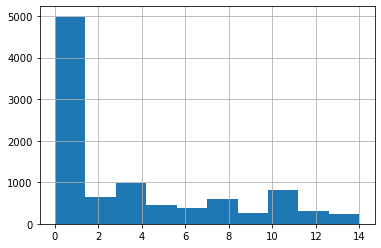

In [43]:
# Double check the data balance
pd.Series(y_train).hist()
# Although the data is not balance, but it not extramly not balance, so we can take a look for accuracy.

In [44]:
# Find accuracy
predictions = model.predict(X_test)
TN = confusion_matrix(y_test, predictions)[0][0]
FP = confusion_matrix(y_test, predictions)[0][1]
FN = confusion_matrix(y_test, predictions)[1][0]
TP = confusion_matrix(y_test, predictions)[1][1]
total = TN + FP + FN + TP
Accuracy = (TP + TN) / float(total)
Accuracy

0.8043875685557587

# 5. Testing & Discussion:

In [45]:
# Find the accuracy of the logistic regression of the test set 
from sklearn import metrics
model = LogisticRegression(C=1,solver='sag')
model.fit(X_train,y_train)
prediction_test=model.predict(X_test)
print('The accuracy of test set of the Ordinal Logistic Regression is',metrics.accuracy_score(prediction_test,y_test))

The accuracy of test set of the Ordinal Logistic Regression is 0.4244402985074627


<div style='color:orange'>Question: Use your optimal model to make classifications on the test set. How does your model perform on the test set vs. the training set? 

<div style='color:blue'>The training set is 41.871%, which shows in the previouse code, and the test set is 42.44%, which is a little bit higher than training set. The reason may be something in sampling, random seed. But the overall the performance is consistant.

<div style='color:Orange'>Question: how to increase the accuracy (test, training)?

<div style='color:blue'>Answer: We can increase the number of the sample size for the minority class size, to make them more balanced dataset. Also try to use more other algorizem, in this assignment, we use the ordinal logistic regression, but we can try to use non linear model, such as decision tree model, random forest.


<div style='color:orange'>Question: Is it overfitting or underfitting?

<div style='color:blue'>Answer:Underfitting, because the accuracy is not high, and the bias is high & variance is low, which means model is not complex .

<AxesSubplot:>

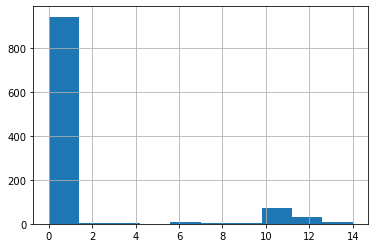

In [46]:
#Plot the distribution of true target variable values and their predictions on both the training set and test set. 
pd.Series(prediction_test).hist()

<AxesSubplot:>

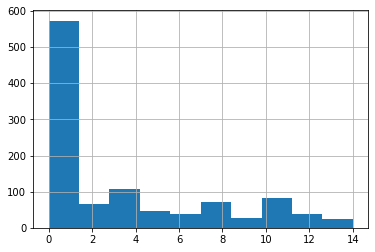

In [47]:
pd.Series(y_test).hist()

<AxesSubplot:>

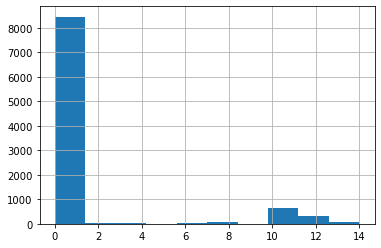

In [48]:
model = LogisticRegression(C=1,solver='sag')
model.fit(X_train,y_train)
prediction_train=model.predict(X_train)
pd.Series(prediction_train).hist()

<AxesSubplot:>

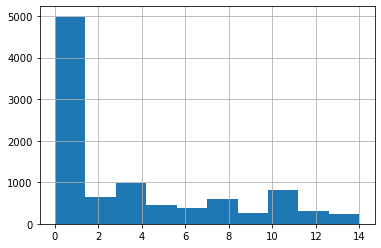

In [49]:
pd.Series(y_train).hist()


<div style='color:orange'>Question: What insight have you gained from the dataset and your trained classification model?

<div style='color:blue'>Answer: So it is really underfitting, the model is really not balanced, and we need to let the model more balanced, the class0 is really high, and the other class is really low, so that influence the accuracy.